# Accurary Line Graph

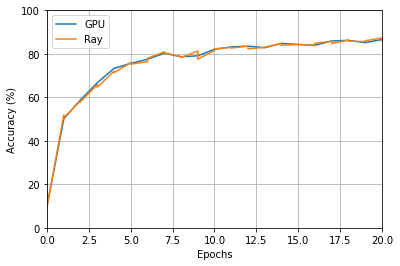

In [24]:
import pandas as pd
from matplotlib import pyplot as plt

df = pd.read_csv("data/gpu(20).csv")
df = df[df["type"] == 1]
df['value1'] = df['value1'] * 100

df1 = pd.read_csv("data/ray(20).csv")
df1 = df1[df1["type"] == 1]
df1['value1'] = df1['value1'] * 100

plt.plot(df["epoch"], df["value1"], label = "GPU")
plt.plot(df1["epoch"], df1["value1"], label = "Ray")

plt.ylim([0, 100])
plt.xlim([0, 20])
plt.xlabel("Epochs")
plt.ylabel("Accuracy (%)")
plt.legend()
plt.grid()
plt.show()

# Bar Graphs

### Getting data

In [6]:
import pandas as pd
from matplotlib import pyplot as plt

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')

df = pd.read_csv("data/gpu20.csv")
df = df[df["type"] == 0]

df1 = pd.read_csv("data/ray-gpu20.csv")
df1 = df1[df1["type"] == 0]

df2 = pd.read_csv("data/ray1-gpu20.csv")
df2 = df2[df2["type"] == 0]

df3 = pd.read_csv("data/s3.csv")
df3 = df3[df3["type"] == 0]

df4 = pd.read_csv("data/ray-s3.csv")
df4 = df4[df4["type"] == 0]

df4.head()

,type,epoch,start,loading,duration,value1,value2
8,0,1,1.658514e+09,445.178844,685.937445,0.25720,0.68804
9,0,1,1.658514e+09,444.898276,686.045958,0.26156,0.68936


### Individual loading and training time graphs

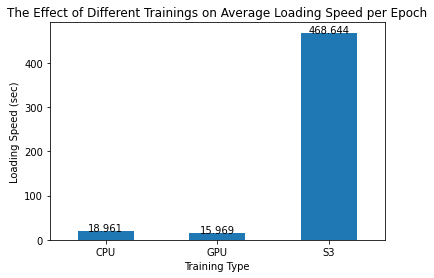

In [27]:
# Loading Time
plotdata = pd.DataFrame(
    {"times": [df1.iloc[-1]['loading'] / df1.iloc[-1]['epoch'], df.iloc[-1]['loading'] / df.iloc[-1]['epoch'], df2.iloc[-1]['loading'] / df2.iloc[-1]['epoch']]}, 
    index=["CPU", "GPU", "S3"])
xs = ["CPU", "GPU", "S3"]
ys = [round(df1.iloc[-1]['loading'] / df1.iloc[-1]['epoch'], 3), round(df.iloc[-1]['loading'] / df.iloc[-1]['epoch'], 3), round(df2.iloc[-1]['loading'] / df2.iloc[-1]['epoch'], 3)]

plotdata["times"].plot(kind = "bar")
plt.title("The Effect of Different Trainings on Average Loading Speed per Epoch")
plt.ylabel("Loading Speed (sec)")
plt.xlabel("Training Type")
plt.xticks(rotation=0, horizontalalignment="center")
addlabels(xs, ys)

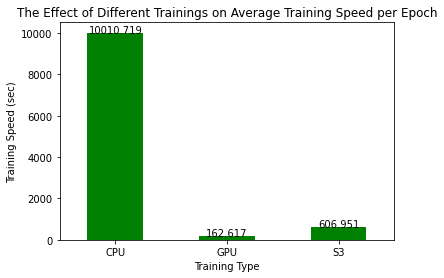

In [28]:
# Training Time
plotdata = pd.DataFrame(
    {"times": [df1.iloc[-1]['duration'] / df1.iloc[-1]['epoch'], df.iloc[-1]['duration'] / df.iloc[-1]['epoch'], df2.iloc[-1]['duration'] / df2.iloc[-1]['epoch']]}, 
    index=["CPU", "GPU", "S3"])
xs = ["CPU", "GPU", "S3"]
ys = [round(df1.iloc[-1]['duration'] / df1.iloc[-1]['epoch'], 3), round(df.iloc[-1]['duration'] / df.iloc[-1]['epoch'], 3), round(df2.iloc[-1]['duration'] / df2.iloc[-1]['epoch'], 3)]

plotdata["times"].plot(kind = "bar", color = "green")
plt.title("The Effect of Different Trainings on Average Training Speed per Epoch")
plt.ylabel("Training Speed (sec)")
plt.xlabel("Training Type")
plt.xticks(rotation=0, horizontalalignment="center")
addlabels(xs, ys)

### Ray Bar Graph

Text(0, 0.5, 'Time (sec)')

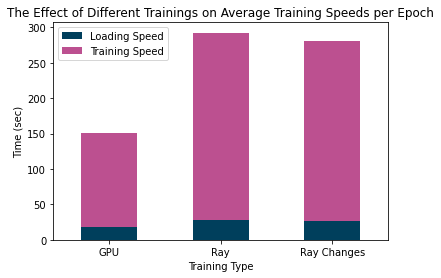

In [7]:
df5 = pd.DataFrame([
        ['GPU', df.iloc[-1]['loading'] / df.iloc[-1]['epoch'], df.iloc[-1]['duration'] / df.iloc[-1]['epoch'] - df.iloc[-1]['loading'] / df.iloc[-1]['epoch']],
        ['Ray', df1.iloc[-1]['loading'] / df1.iloc[-1]['epoch'], df1.iloc[-1]['duration'] / df1.iloc[-1]['epoch'] - df1.iloc[-1]['loading'] / df1.iloc[-1]['epoch']], 
        ['Ray Changes', df2.iloc[-1]['loading'] / df2.iloc[-1]['epoch'], df2.iloc[-1]['duration'] / df2.iloc[-1]['epoch'] - df2.iloc[-1]['loading'] / df2.iloc[-1]['epoch']]],
        columns=['Training Type', 'Loading Speed', 'Training Speed'])
df5.plot(x='Training Type', kind='bar', stacked=True,
        title='The Effect of Different Trainings on Average Training Speeds per Epoch', color=['#003f5c', '#bc5090'])
plt.xticks(rotation=0, horizontalalignment="center")
plt.ylabel("Time (sec)")

### Ray on S3 Bar Graph

Text(0, 0.5, 'Time (sec)')

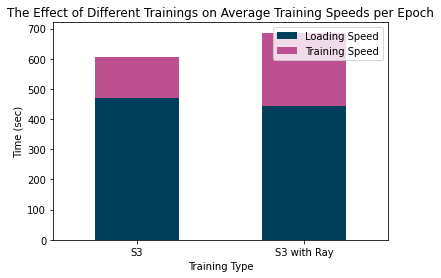

In [8]:
df6 = pd.DataFrame([
        ['S3', df3.iloc[-1]['loading'] / df3.iloc[-1]['epoch'], df3.iloc[-1]['duration'] / df3.iloc[-1]['epoch'] - df3.iloc[-1]['loading'] / df3.iloc[-1]['epoch']],
        ['S3 with Ray', df4.iloc[-1]['loading'] / df4.iloc[-1]['epoch'], df4.iloc[-1]['duration'] / df4.iloc[-1]['epoch'] - df4.iloc[-1]['loading'] / df4.iloc[-1]['epoch']]],
        columns=['Training Type', 'Loading Speed', 'Training Speed'])
df6.plot(x='Training Type', kind='bar', stacked=True,
        title='The Effect of Different Trainings on Average Training Speeds per Epoch', color=['#003f5c', '#bc5090'])
plt.xticks(rotation=0, horizontalalignment="center")
plt.ylabel("Time (sec)")